In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-10-13 04:20:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.204.128, 172.217.203.128, 172.253.123.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   124MB/s    in 0.5s    

2021-10-13 04:20:45 (124 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [9]:
import os
import zipfile



In [12]:
import os
import zipfile

# 개 고양이 이미지 자료 다운로드
#!wget --no-check-certificate \
#https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \-O  ./tmp/cats_and_dogs_filtered.zip

# 현재작업폴더 하위의 tmp폴더에 있는 zip 파일 압축해제
local_zip = './tmp/cats_and_dogs_filtered.zip'
#zip_ref = zipfile.ZipFile(local_zip, 'r')
#zip_ref.extractall('./tmp')
#zip_ref.close()

#print('--end---')


# 작업경로 설정

#-----------기본경로
base_dir = './tmp/cats_and_dogs_filtered'

# 기본경로+폴더명 작성  (폴더명을 os.listdir 로 가져와서 작업해도 됨)
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')

train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

print('end')


end


In [13]:
train_cats_dir

'./tmp/cats_and_dogs_filtered/train/cats'

In [14]:
train_cats_fnames=os.listdir(train_cats_dir)
train_dogs_fnames=os.listdir(train_dogs_dir)
validation_cats_fnames=os.listdir(validation_cats_dir)
validation_dogs_fnames=os.listdir(validation_dogs_dir)

In [17]:
len(train_cats_fnames), len(train_dogs_fnames)

(1000, 1000)

In [19]:
len(train_cats_fnames), len(train_dogs_fnames)

(1000, 1000)

In [18]:
len(validation_cats_fnames),len(validation_dogs_fnames)

(500, 500)

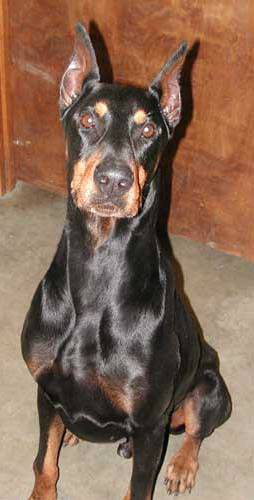

In [23]:
# 샘플사진보기
# 이미지 읽고 출력
sample = train_dogs_dir +'/' + train_dogs_fnames[1]
from PIL import Image
Image.open(sample)

In [24]:
##텐서플로우의 이미지제너레이터를 이용하여서 데이터를 스케일링 함
# 이작업에서는 사진의 회전, 확대 등 증강 기술들이 사용됨
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

In [26]:
# 훈련과 테스트 자료를 폴터 단위로 배치만큼만 읽으면서 x,y값의 형태를 제작
# 폴더안의 파일단위로 array를 append 하고 폴더가 바뀌면 리스트추가해서 다시 append하고,
# 2개의 폴더가 있어서
train_generator=train_datagen.flow_from_directory(train_dir,batch_size=20,target_size=(150,150),
                                                  class_mode='binary')
test_generator=test_datagen.flow_from_directory(validation_dir,batch_size=20,target_size=(150,150),
                                                  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


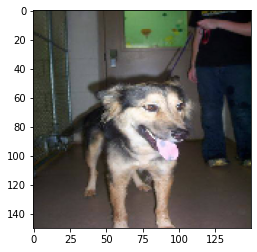

In [35]:
import numpy as np
import matplotlib.pyplot as plt
train_generator[0][0]
len(train_generator)        # 트레이닝 전체자료는 1000+ 1000 개의 2000개, 그중 배치사이즈가 20이기 때문에 100이 나옴
len(test_generator)      # 1000/20 = 50
np.shape(train_generator[1][0][0])
plt.imshow(train_generator[1][0][0])

In [40]:
#len(train_generator[1]) # 2는 이미지자료를 갖고있는 array와 레이블 정보를 갖고있는 array 2개 있음.

#train_generator[0][1] # cat 0 , dog 1 

#train_generator[0][0] # 이미지 값
len(train_generator) # 배치단위 갯수
# train_generator[0] train_generator[1] train_generator[2] ... train_generator[99] 해서 100개의 배치자료가 있음

100

In [ ]:
# 강사님 정리 
len(train_generator[0])   # 2는 이미지자료를갖고있는 array와 레이블 정보를 갖고있는 array 2개있음.

# 사진이미지 pixcel값
# train_generator[0][0] : 이미지 값
#train_generator[0][0][0],train_generator[0][0][1],train_generator[0][0][2]

# 개,고양이 레이블값
np.shape(train_generator[0][1]) # cat는 0, dog는 1로 고양이와 개의 bool값


len(train_generator)   # 배치단위 갯수 
# train_generator[0], train_generator[1], train_generator[2] ..... train_generator[99]  해서 100개의 배치자료가 있음.
# train_generator[0][0][0] => 0번째배치(0~99번째사진)의 사진중 사진이미지를 갖고있는 array의 첫번째 사진
# train_generator[0][1][0] => 0번째배치(0~99번째사진)의 사진중 레이블 이미지를 갖고있는 array의 첫번째 레이블값

# train_generator[1][0][0] => 1번째배치(100~199번째사진)의 사진중 사진이미지를 갖고있는 array의 첫번째 사진


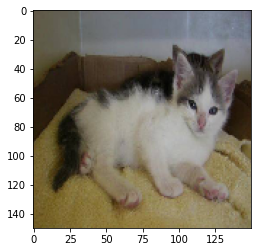

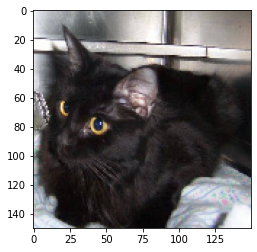

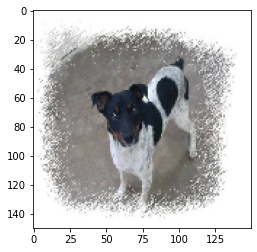

In [37]:
for i in range(3):
  plt.imshow(train_generator[0][0][i])
  plt.show()

In [53]:
# 모델 구축
# - 파람 계산 공식 -
# 첫번째 Param 계산공식 (필터*필터*input수(1장)채널*유닛수)+바이어스수(유닛수)
# 두번째부터 Param 계산공식 (필터*필터*?*유닛수) + 바이어스수(유닛수)
 
### Output shape 계산공식    ((input shape 수 - 필터 + 2*패딩수) / 스트라이드수) + 1
# 첫번째 (150-3 + 2*0)/1  +  1
# 두번째 model.add (74 - 3 + 2*0)1 + 1
# 세번째 (72 - 3 + 2*0)/1 + 1

from tensorflow.keras import layers,models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),                                    # 필터 : 무작위의 값을 갖는 3*3의 9개의 픽셀임, 9개의 픽셀이  이미지의 각 픽셀과 곱셈
                        activation='relu', input_shape=(150,150,3)))    # 즉 3*3 필터가 3개의 채널을 모두 계산해야함. w값이 (3*3)*3*32 = 896개의 Param
#model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))    # (3*3*32*64) + 64
model.add(layers.Conv2D(128,(3,3), activation='relu'))    # (3*3*64*128) + 128

In [49]:

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 146, 146, 64)      18496     
Total params: 19,392
Trainable params: 19,392
Non-trainable params: 0
_________________________________________________________________


In [54]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))   
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu')) 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())   # 7*7*128=6272
model.add(layers.Dense(512, activation='relu'))  
model.add(layers.Dense(1, activation='sigmoid'))


In [55]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)      

In [56]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100, 
      epochs=30,
      validation_data=test_generator,
      validation_steps=50)


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")
/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 114s 1s/step - loss: 0.6876 - acc: 0.5430 - val_loss: 0.6720 - val_acc: 0.5870
Epoch 2/30
100/100 [==============================] - 113s 1s/step - loss: 0.6601 - acc: 0.6130 - val_loss: 0.6333 - val_acc: 0.6700
Epoch 3/30
100/100 [==============================] - 114s 1s/step - loss: 0.6081 - acc: 0.6735 - val_loss: 0.5914 - val_acc: 0.6910
Epoch 4/30
100/100 [==============================] - 111s 1s/step - loss: 0.5708 - acc: 0.7095 - val_loss: 0.5707 - val_acc: 0.7120
Epoch 5/30
100/100 [==============================] - 111s 1s/step - loss: 0.5476 - acc: 0.7220 - val_loss: 0.5702 - val_acc: 0.7110
Epoch 6/30
100/100 [==============================] - 112s 1s/step - loss: 0.5122 - acc: 0.7440 - val_loss: 0.6238 - val_acc: 0.6610
Epoch 7/30
100/100 [==============================] - 113s 1s/step - loss: 0.4840 - acc: 0.7640 - val_loss: 0.5474 - val_acc: 0.7300
Epoch 8/30
100/100 [==============================] - 114s 1s/step - 

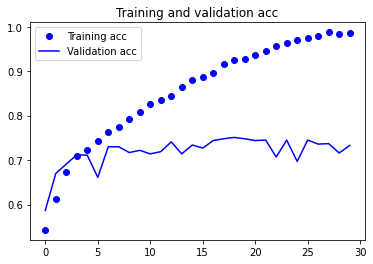

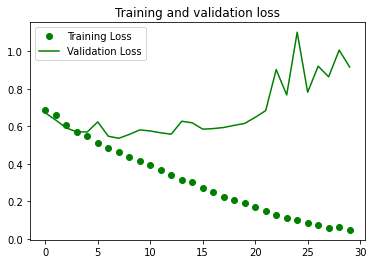

In [58]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

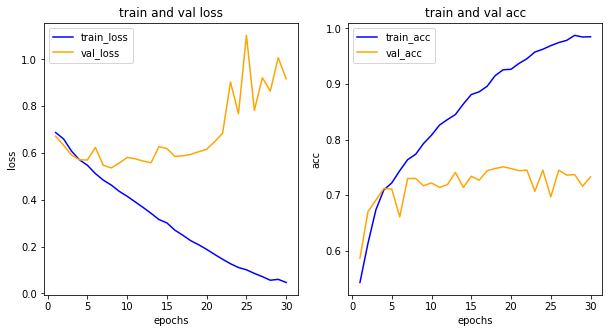

In [57]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] 

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()

In [59]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

def pred():
  uploaded=files.upload()

  for fn in uploaded.keys():

    path='/content/' + fn
    img=image.load_img(path, target_size=(150, 150))

    x=image.img_to_array(img)
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)

    print(classes[0])

    if classes[0]>0:
      print(fn + " 사진은 강아지 입니다.")
    else:
      print(fn + " 사진은 고양이 입니다.")

In [63]:
pred()

Saving 201904291390027161_3.jpg to 201904291390027161_3 (1).jpg
[0.]
201904291390027161_3.jpg 사진은 고양이 입니다.


In [64]:
# -------------------이미지 어그멘테이션
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range= 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest') 
# fill_mode에는 'constant', 'nearest', 'reflect', 'wrap'
validation_datagen = ImageDataGenerator(rescale=1./255) 

In [65]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=20, # batch_size는 한번 flow_from_directory가 실행 될 때 생성할 이미지 수
                                                    target_size=(150,150),#크기
                                                    class_mode = 'binary')# 0 or 1로 labelling

Found 2000 images belonging to 2 classes.


In [66]:
validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                              batch_size=20,
                                                              target_size=(150,150),
                                                              class_mode = 'binary')

Found 1000 images belonging to 2 classes.


In [67]:
from tensorflow.keras import layers, models
from tensorflow.keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [68]:
x=[0.00001, 0.000002, 0.000003, 0.999992, 0.000003]
np.argmax(x)

3

In [69]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [70]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 123s 1s/step - loss: 0.6937 - acc: 0.5190 - val_loss: 0.6967 - val_acc: 0.5030
Epoch 2/30
100/100 [==============================] - 124s 1s/step - loss: 0.6786 - acc: 0.5710 - val_loss: 0.6707 - val_acc: 0.5820
Epoch 3/30
100/100 [==============================] - 122s 1s/step - loss: 0.6712 - acc: 0.5865 - val_loss: 0.6470 - val_acc: 0.6420
Epoch 4/30
100/100 [==============================] - 118s 1s/step - loss: 0.6619 - acc: 0.5990 - val_loss: 0.6302 - val_acc: 0.6320
Epoch 5/30
100/100 [==============================] - 118s 1s/step - loss: 0.6384 - acc: 0.6260 - val_loss: 0.5923 - val_acc: 0.6680
Epoch 6/30
100/100 [==============================] - 120s 1s/step - loss: 0.6221 - acc: 0.6465 - val_loss: 0.5705 - val_acc: 0.7070
Epoch 7/30
100/100 [==============================] - 119s 1s/step - loss: 0.6179 - acc: 0.6420 - val_loss: 0.5724 - val_acc: 0.6970
Epoch 8/30
100/100 [==============================] - 119s 1s/step - 

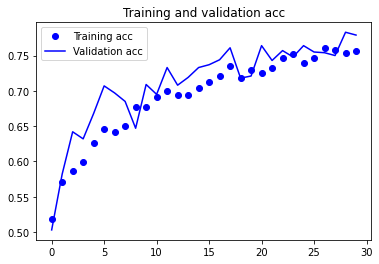

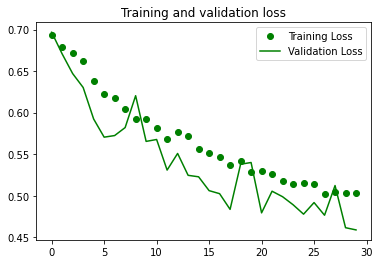

In [71]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'go', label='Training Loss')
plt.plot(epochs, val_loss, 'g', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [72]:
model.save('개고양이이미지제너레이터.h5')